In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [3]:
dates=pd.date_range(start='2025-07-01', periods=30, freq='D')

In [4]:
date={
    "Date":np.tile(dates,len(apartments)),
    "Appartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}

In [5]:
df=pd.DataFrame(date)

In [6]:
df

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,24.398047
1,2025-07-02,Apt_1,14.893361
2,2025-07-03,Apt_1,22.384915
3,2025-07-04,Apt_1,24.448996
4,2025-07-05,Apt_1,21.346313
...,...,...,...
595,2025-07-26,Apt_20,11.876737
596,2025-07-27,Apt_20,20.932574
597,2025-07-28,Apt_20,23.133898
598,2025-07-29,Apt_20,20.187145


In [7]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [8]:
df

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,24.40
1,2025-07-02,Apt_1,14.89
2,2025-07-03,Apt_1,22.38
3,2025-07-04,Apt_1,24.45
4,2025-07-05,Apt_1,21.35
...,...,...,...
595,2025-07-26,Apt_20,11.88
596,2025-07-27,Apt_20,20.93
597,2025-07-28,Apt_20,23.13
598,2025-07-29,Apt_20,20.19


In [9]:
print(df.isnull().sum())

Date                 0
Appartment           0
Electricity_usage    0
dtype: int64


In [10]:
df.dtypes

Date                 datetime64[ns]
Appartment                   object
Electricity_usage           float64
dtype: object

In [11]:
df.head()

,Date,Appartment,Electricity_usage
0,2025-07-01,Apt_1,24.40
1,2025-07-02,Apt_1,14.89
2,2025-07-03,Apt_1,22.38
3,2025-07-04,Apt_1,24.45
4,2025-07-05,Apt_1,21.35


In [12]:
df.tail()

,Date,Appartment,Electricity_usage
595,2025-07-26,Apt_20,11.88
596,2025-07-27,Apt_20,20.93
597,2025-07-28,Apt_20,23.13
598,2025-07-29,Apt_20,20.19
599,2025-07-30,Apt_20,19.65


In [13]:
df.shape

(600, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               600 non-null    datetime64[ns]
 1   Appartment         600 non-null    object        
 2   Electricity_usage  600 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.2+ KB


In [15]:
usage_per_apartment=df.groupby("Appartment")["Electricity_usage"].sum()
print(usage_per_apartment)

Appartment
Apt_1     609.36
Apt_10    588.29
Apt_11    577.32
Apt_12    594.99
Apt_13    611.24
Apt_14    586.24
Apt_15    586.74
Apt_16    605.60
Apt_17    597.11
Apt_18    607.30
Apt_19    557.25
Apt_2     613.44
Apt_20    589.58
Apt_3     623.73
Apt_4     588.07
Apt_5     604.29
Apt_6     596.45
Apt_7     594.11
Apt_8     622.08
Apt_9     566.81
Name: Electricity_usage, dtype: float64


In [16]:
usage_per_apartment=df.groupby("Appartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Appartment
Apt_3     623.73
Apt_8     622.08
Apt_2     613.44
Apt_13    611.24
Apt_1     609.36
Apt_18    607.30
Apt_16    605.60
Apt_5     604.29
Apt_17    597.11
Apt_6     596.45
Apt_12    594.99
Apt_7     594.11
Apt_20    589.58
Apt_10    588.29
Apt_4     588.07
Apt_15    586.74
Apt_14    586.24
Apt_11    577.32
Apt_9     566.81
Apt_19    557.25
Name: Electricity_usage, dtype: float64


In [17]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    19.6555
2025-07-02    19.9295
2025-07-03    20.4185
2025-07-04    20.3185
2025-07-05    20.8805
Name: Electricity_usage, dtype: float64


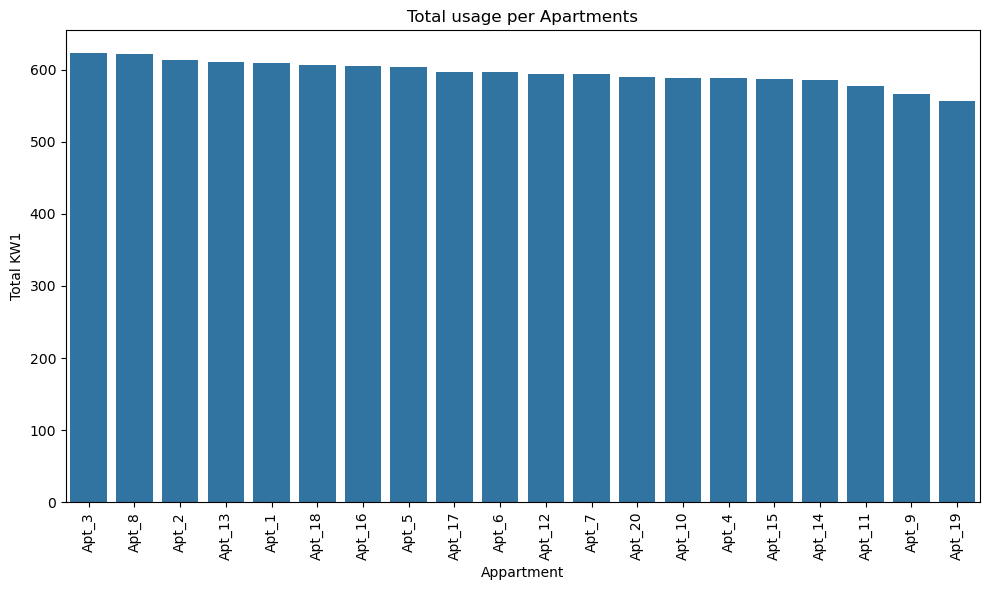

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y= usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()

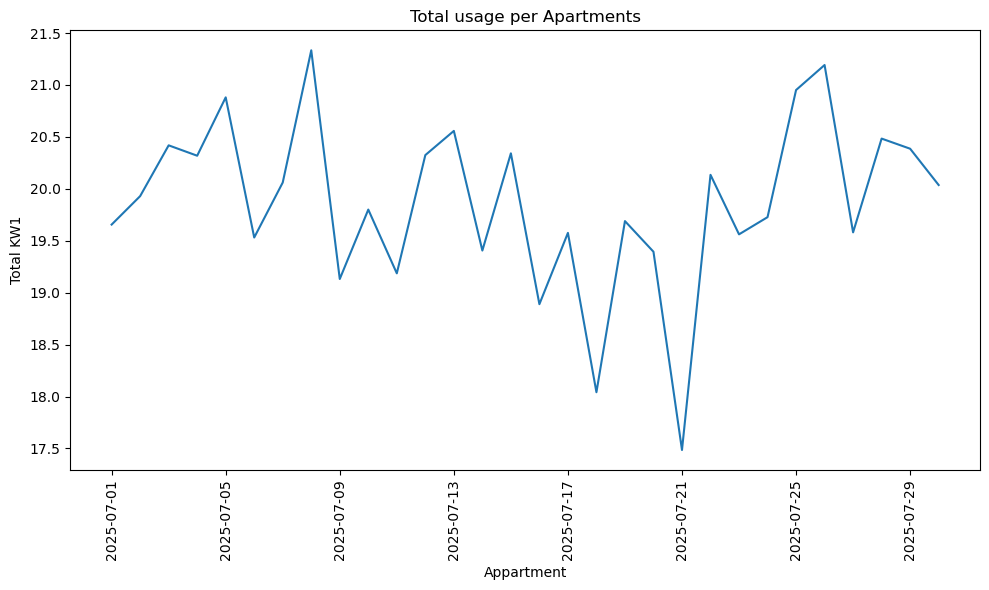

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y= daily_avg.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()

In [24]:
thresholds=df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"] > thresholds
print(df[df["High_usage_flag"] == True].head())

          Date Appartment  Electricity_usage  High_usage_flag
20  2025-07-21      Apt_1              32.65             True
64  2025-07-05      Apt_3              30.20             True
112 2025-07-23      Apt_4              32.44             True
168 2025-07-19      Apt_6              31.06             True
175 2025-07-26      Apt_6              31.34             True
